# SVM(Supper Vector Machine)

### SVM을 활용한 비만도(BMI) 측정 예측
- BMI = 몸무게(Kg) / 키(m) * 키(m)
- BMI가 18.5이상 25미만일때가 표준 몸무게 입니다.

In [22]:
# 데이터를 획득하기 위해 무작위로 2만명 데이터를 생성.
# 키(cm), 몸무게(kg), Lebel(저체중(thin), 정상체중(normal) 비만(fat))의 csv 생성

import random

# BMI를 계산해서 Label을 return하는 함수만들기
def calc_bmi(h,w):
    bmi = w / (h/100) ** 2
    if bmi < 18.5 : return "thin" 
    if bmi < 25 : return "normal"
    return "fat"
    # return은 한번만 내려가기에 ifel를 쓸 필요가 없다.

# 저장파일 준비하기
fp = open("../Data/bmi.csv",'w', encoding='utf-8')
fp.write('height,weight,label\r\n')

# 무작위로 데이터 생성하기
cnt = {"thin" : 0, "normal" : 0, "fat": 0}

for i in range(20000):
    h = random.randint(120, 200)
    w = random.randint(35, 80)
    label = calc_bmi(h, w)
    cnt[label] += 1
    fp.write("{0},{1},{2}\r\n".format(h,w,label))
fp.close()
print("OK :", cnt)

OK : {'thin': 6245, 'normal': 5947, 'fat': 7808}


---
### BMI공식을 사용하지 않고 BMI 예측

In [23]:
import pandas as pd

In [24]:
# 데이터 불러오기
tbl = pd.read_csv("../Data/bmi.csv")
tbl.head()

,height,weight,label
0,158,55,normal
1,196,64,thin
2,161,52,normal
3,196,45,thin
4,138,55,fat


In [25]:
# 컬럼을 분리하여 정규화 하기
tbl.describe() # 표준편차가 크면 정규화 한다. 
# 하지만 별로 안크지만 하기로함
label =tbl['label']
w = tbl['weight'] / 80
h = tbl['height'] /200

In [26]:
body_data = pd.concat([w,h], axis=1)
body_data

,weight,height
0,0.6875,0.790
1,0.8000,0.980
2,0.6500,0.805
3,0.5625,0.980
4,0.6875,0.690
...,...,...
19995,0.6875,0.705
19996,0.8000,0.910
19997,0.5000,0.640
19998,0.9500,0.630


In [27]:
# 학습용과 훈련용으로 나누기
from sklearn.model_selection import train_test_split
train_data, test_data, train_label, test_label = train_test_split(body_data, label)

In [28]:
#데이터 학습하기
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(train_data,train_label)

RandomForestClassifier()

In [29]:
# 정확도 구하기
clf.score(test_data,test_label)

0.9996

In [31]:
# Confusion Matrix 출력하기
from sklearn import svm, metrics

pred = clf.predict(test_data)
report =metrics.confusion_matrix(test_label,pred)
print(report)
cl_report =metrics.classification_report(test_label,pred)
print(cl_report)

[[1973    0    0]
 [   0 1480    0]
 [   0    2 1545]]
              precision    recall  f1-score   support

         fat       1.00      1.00      1.00      1973
      normal       1.00      1.00      1.00      1480
        thin       1.00      1.00      1.00      1547

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



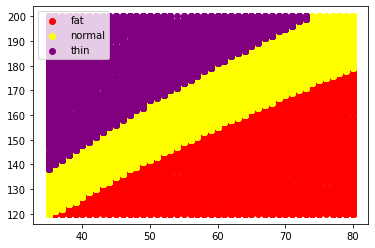

In [32]:
# 시각화 해보기
import matplotlib.pyplot as plt
tbl = pd.read_csv("../Data/bmi.csv", index_col=2) #index_col=2 : 2번컬럼을 인덱스로불러오기
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

def scatter(lbl, color):
    b = tbl.loc[lbl]
    ax.scatter(b['weight'], b['height'], c =color, label =lbl)
# python은 이렇게 쓰는것이 좋다!

scatter('fat','red')
scatter('normal','yellow')
scatter('thin','purple')
ax.legend()
plt.savefig("../Data/bmi-test.png")
plt.show()

---
# SVM의 종류
- SVC(Classification)
- NuSVC : " "
- LinearSVC : SVM중에서 가장 빠름, SVC대비 약 3배정도 빠름

#### SVC,LinearSVC
- clf =svm.SVC()
- clf =svm.LinearSVC() # 속도는 빠르나 예측력이 떨어진다.


In [35]:
# svm.LinearSVC()로 학습히기
clf = svm.LinearSVC()
clf.fit(train_data,train_label)

LinearSVC()

In [36]:
# svm.LinearSVC()으로 정확도 구하기
clf.score(test_data,test_label)

0.9304

In [37]:
# svm.LinearSVC()으로 Confusion Matrix 출력하기
pred = clf.predict(test_data)
report =metrics.confusion_matrix(test_label,pred)
print(report)
cl_report =metrics.classification_report(test_label,pred)
print(cl_report)

[[1973    0    0]
 [ 189 1133  158]
 [   0    1 1546]]
              precision    recall  f1-score   support

         fat       0.91      1.00      0.95      1973
      normal       1.00      0.77      0.87      1480
        thin       0.91      1.00      0.95      1547

    accuracy                           0.93      5000
   macro avg       0.94      0.92      0.92      5000
weighted avg       0.94      0.93      0.93      5000

